ML Image classification project to identify seperatly Cristiano Ronaldo and Messi.

In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

Image reading

In [2]:
img2= cv2.imread('./test images/test/ronaldo2.jpg')
img2.shape

(933, 750, 3)

In [3]:
img1= cv2.imread('./test images/test/ronaldo1.jpg')
img1.shape

(1350, 1080, 3)

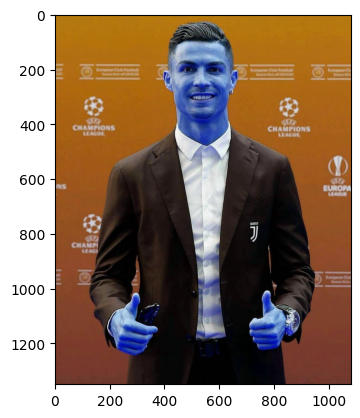

In [4]:
plt.imshow(img1)

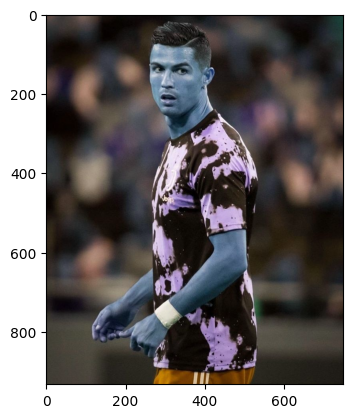

In [5]:
plt.imshow(img2)

Convert to gray

In [6]:
gray=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
gray.shape

(1350, 1080)

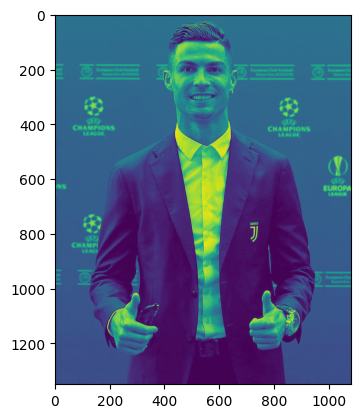

In [7]:
plt.imshow(gray)

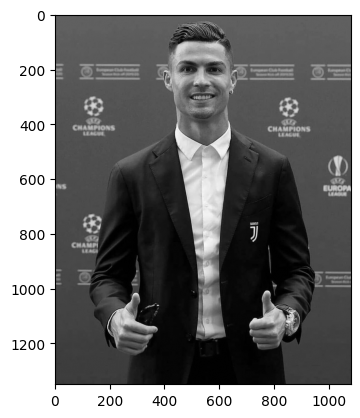

In [8]:
plt.imshow(gray, cmap='gray')

Face Detection

In [9]:
face_cascade= cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

eye_cas= cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")
faces= face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[392,  84, 287, 287]], dtype=int32)

In [10]:
(x,y,w,h)=faces[0]
x,y,w,h

(np.int32(392), np.int32(84), np.int32(287), np.int32(287))

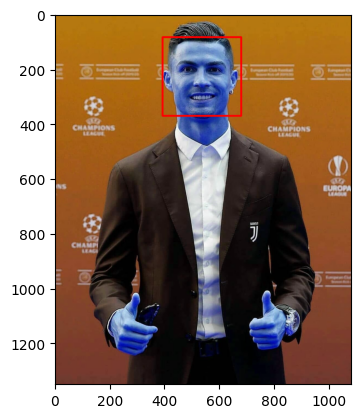

In [11]:
face_img=cv2.rectangle(img1,(x,y),(x+w, y+h),(255,0,0),5)
plt.imshow(face_img)

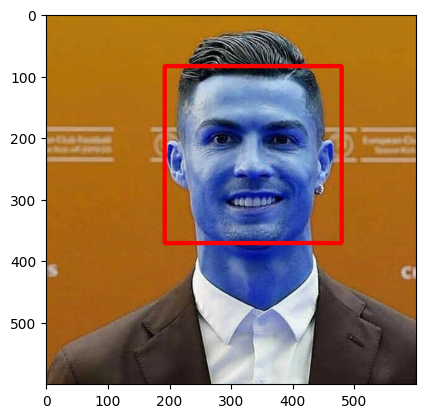

In [12]:
resized = cv2.resize(img1, (224,224))

# crop (y1:y2, x1:x2)
crop = img1[0:600, 200:800]
plt.imshow(crop)


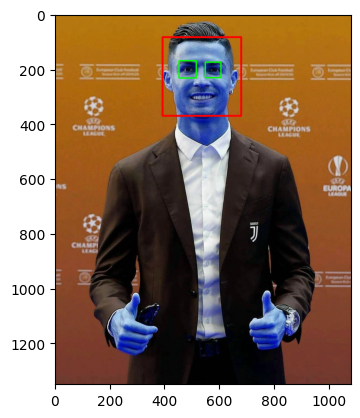

In [13]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img=cv2.rectangle(img1,(x,y),(x+w, y+h),(255,0,0),5)
    gray_face=gray[y:y+h , x:x+w]
    color_face=face_img[y:y+h , x:x+w]
    eyes= eye_cas.detectMultiScale(gray_face)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(color_face,(ex,ey),(ex+ew , ey+eh), (0,255,0),3)

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()
        

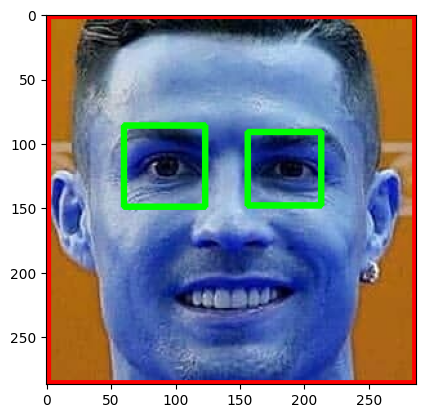

In [14]:
%matplotlib inline
plt.imshow(color_face, cmap='gray')

How to get cropped image calling funtion

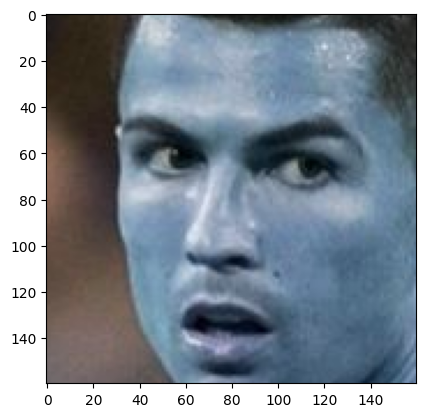

In [15]:
def get_cropped_image(getimage):
    img= cv2.imread(getimage)
    #if img is None:
        #return None
    
    gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces= face_cascade.detectMultiScale(gray, 1.3,5)
    #if len(faces)==0:
        #return None
        
    for (x,y,w,h) in faces:
        roi_gray=gray[y:y+h , x:x+w]
        roi_color= img[y:y+h, x:x+w]
        eyes=eye_cas.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_color

original_image= cv2.imread('./test images/test/ronaldo2.jpg')
plt.imshow(original_image)

cropped_image = get_cropped_image('./test images/test/ronaldo2.jpg')
plt.imshow(cropped_image)

Then we can get all images to process and then pass all cropped images to another folder.

In [17]:
current_data="./data/raw_images"
cropped_imgs="./data/cropped images/"

In [18]:
import os
img_dirs=[]
for entry in os.scandir(current_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

img_dirs

['./data/raw_images\\Messi', './data/raw_images\\Ronaldo']

In [19]:
import shutil
if os.path.exists(cropped_imgs):
    shutil.rmtree(cropped_imgs)
os.mkdir(cropped_imgs)

In [20]:
cropped_imgs

'./data/cropped images/'

In [28]:
img_dirs

['./data/raw_images\\Messi', './data/raw_images\\Ronaldo']

In [45]:
cropped_imgs_directory = []
players_file_dict = {}

for new_img_dir in img_dirs:
    player_name = os.path.basename(new_img_dir).lower()

    print (player_name)
    players_file_dict[player_name]=[]
    count=1
    for entry in os.scandir(new_img_dir):
        if not entry.is_file():
            continue
        if not entry.name.lower().endswith(('.png','.jpg','.jpeg')):
            continue
        
        roi_color = get_cropped_image(entry.path)
        if roi_color is not None:
            cropped_folder=os.path.join (cropped_imgs, player_name)
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_imgs_directory.append(cropped_folder)
                print ("Generated folder with cropped images : ", cropped_folder)
            cropped_file_name = f"{player_name}{count}.png"
            cropped_file_path= os.path.join(cropped_folder, cropped_file_name)
            cv2.imwrite(cropped_file_path , roi_color)
            players_file_dict[player_name].append(cropped_file_path)
            count +=1

messi
ronaldo


FEATURE ENGINEERING

In [46]:
import pywt
import numpy as np
import cv2

In [47]:
def w2d(img, mode='haar', level=1):
    imarray=img
    imarray=cv2.cvtColor(imarray, cv2.COLOR_RGB2GRAY)
    imarray= np.float32(imarray)
    imarray /=255;

    coeffs=pywt.wavedec2(imarray,mode,level=level)
    coeffs_H = list(coeffs)
    coeffs_H [0]*=0;

    imarray_H = pywt.waverec2(coeffs_H, mode);
    imarray_H *=255;
    imarray_H = np.uint8(imarray_H)

    return imarray_H

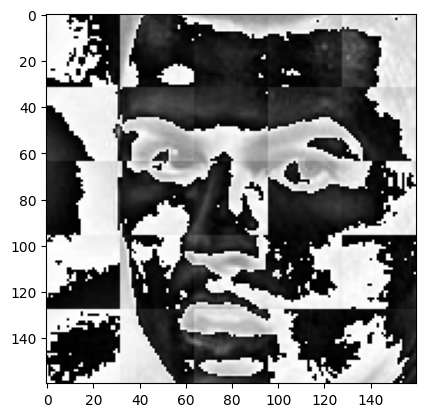

In [48]:

im_har = w2d(cropped_image, 'db1', 5)
plt.imshow(im_har , cmap='gray')


In [49]:
players_file_dict

{'messi': ['./data/cropped images/messi\\messi1.png',
  './data/cropped images/messi\\messi2.png',
  './data/cropped images/messi\\messi3.png',
  './data/cropped images/messi\\messi4.png',
  './data/cropped images/messi\\messi5.png',
  './data/cropped images/messi\\messi6.png',
  './data/cropped images/messi\\messi7.png',
  './data/cropped images/messi\\messi8.png',
  './data/cropped images/messi\\messi9.png',
  './data/cropped images/messi\\messi10.png',
  './data/cropped images/messi\\messi11.png',
  './data/cropped images/messi\\messi12.png',
  './data/cropped images/messi\\messi13.png',
  './data/cropped images/messi\\messi14.png',
  './data/cropped images/messi\\messi15.png',
  './data/cropped images/messi\\messi16.png',
  './data/cropped images/messi\\messi17.png',
  './data/cropped images/messi\\messi18.png',
  './data/cropped images/messi\\messi19.png',
  './data/cropped images/messi\\messi20.png',
  './data/cropped images/messi\\messi21.png',
  './data/cropped images/messi\\me

In [50]:
class_dict ={}
count=0
for player_name in players_file_dict.keys():
    class_dict[player_name]=count
    count=count+1

class_dict

{'messi': 0, 'ronaldo': 1}

In [51]:
x,y = [],[]
for player_name , training_files in players_file_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img , (32,32))
        img_har = w2d(img, 'db1',5)
        scalled_img_har = cv2.resize(img_har, (32,32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))

        x.append(combined_img)
        y.append(class_dict[player_name])

In [52]:
len(x[0])

4096

In [53]:
x[0]

array([[ 58],
       [170],
       [252],
       ...,
       [ 44],
       [150],
       [ 43]], dtype=uint8)

In [54]:
x=np.array(x).reshape(len(x),4096).astype(float)
x.shape

(103, 4096)

In [55]:
x[0]

array([ 58., 170., 252., ...,  44., 150.,  43.])

TRAIN THE MODEL

In [56]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0)

In [58]:
pipe= Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf' , C=10))])
pipe.fit(x_train, y_train)
pipe.score (x_test, y_test)

0.8846153846153846

In [59]:
print (classification_report(y_test, pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.83      1.00      0.91        15

    accuracy                           0.88        26
   macro avg       0.92      0.86      0.88        26
weighted avg       0.90      0.88      0.88        26



In [60]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [61]:
model_params = {
    'svm':{
        'model':svm.SVC(gamma = 'auto', probability=True),
        'params': {
            'svc__C':[1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }
    },
    'random_forest':{
        'model': RandomForestClassifier(),
        'params': {
            'randomforestclassifier__n_estimators':[1,5,10]
        }   
    },
    'Logistic_regression':{
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'logisticregression__C':[1,5,10]
        } 
    }
}
 

In [62]:
scores = []
best_estimators={}
import pandas as pd
for algo, mp in model_params.items():
    pipe= make_pipeline(StandardScaler(), mp['model'])
    clf=GridSearchCV(pipe, mp['params'], cv=5, return_train_score = False)
    clf.fit(x_train, y_train)
    scores.append({
        'model':algo,
        'best_score': clf.best_score_,
        'best_params':clf.best_params_
    })

    best_estimators[algo]=clf.best_estimator_
df= pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, 

,model,best_score,best_params
0,svm,0.895833,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.765833,{'randomforestclassifier__n_estimators': 5}
2,Logistic_regression,0.883333,{'logisticregression__C': 1}


In [63]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=5))]),
 'Logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, multi_class='auto',
                                     solver='liblinear'))])}

In [64]:
best_estimators['svm'].score(x_test,y_test)

0.9615384615384616

In [65]:
best_estimators['random_forest'].score(x_test,y_test)

0.6153846153846154

In [66]:
best_estimators['Logistic_regression'].score(x_test,y_test)

0.9615384615384616

In [67]:
best_clf=best_estimators['svm']
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, best_clf.predict(x_test))
cm

array([[10,  1],
       [ 0, 15]])

{'messi': 0, 'ronaldo': 1}

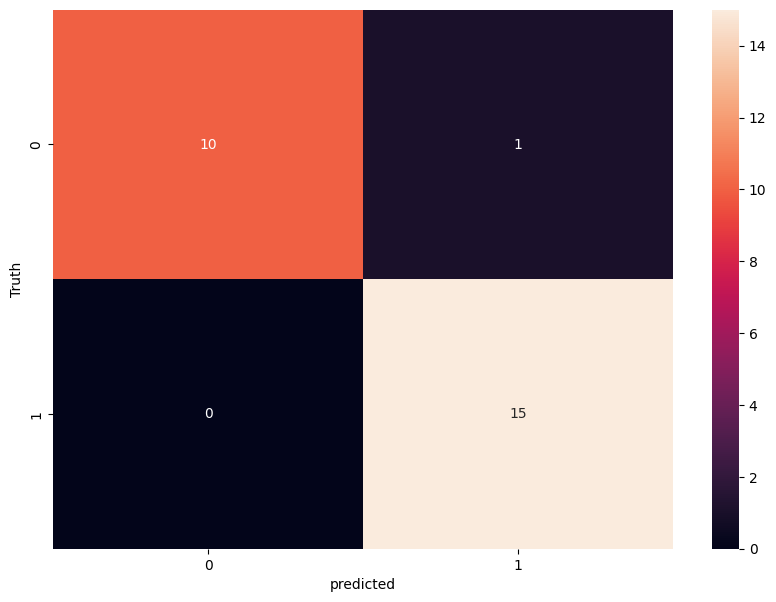

In [69]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

class_dict

Then we can save our model

In [70]:
import pickle
with open ('model.pickle','wb') as file:
    pickle.dump(best_clf,file)

In [71]:
import json
with open("save_class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))